# Data Analysis : Ultimate Fighting Championship

In [137]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display, HTML
plt.style.use('default')

df = pd.read_csv('fight_data.csv')

In [138]:
df.shape

(1477, 895)

In [139]:
df = df[['B_Name', 'R_Name', 'winner', 'B_Age', 'R_Age', 'winby', 'B_Location', 'R_Location', 'Date', 'R_Height', 'B_Height', 'Last_round', 'Max_round', 'B_Weight', 'R_Weight']]

In [140]:
df.head()

,B_Name,R_Name,winner,B_Age,R_Age,winby,B_Location,R_Location,Date,R_Height,B_Height,Last_round,Max_round,B_Weight,R_Weight
0,Marvin Vettori,Antonio Carlos Junior,red,23.0,27.0,DEC,Mezzocorona Italy,"Coconut Creek, Florida United States",01/02/2017,187,182.0,3,3,84,84
1,Carlos Diego Ferreira,Colton Smith,blue,32.0,29.0,SUB,"Pharr, Texas USA","Fort Hood, TX USA",06/30/2014,182,175.0,1,3,70,70
2,Takanori Gomi,Joe Lauzon,red,38.0,32.0,KO/TKO,Tokyo Japan,"Bridgewater, Massachusetts USA",07/27/2015,177,172.0,1,3,70,70
3,Brandon Moreno,Louis Smolka,blue,23.0,25.0,SUB,Tijuana Mexico,"Kapolei, HI USA",10/03/2016,175,170.0,1,3,56,56
4,Elizabeth Phillips,Raquel Pennington,red,30.0,28.0,DEC,"Spokane, WA USA","Colorado Spring, Colorado United States",08/22/2016,170,167.0,3,3,61,61


In [141]:
df.describe()

,B_Age,R_Age,R_Height,B_Height,Last_round,Max_round,B_Weight,R_Weight
count,1474.000000,1476.000000,1477.000000,1476.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,30.954545,31.380081,177.436696,177.451220,2.417062,3.208531,73.804333,73.935003
std,4.020311,4.098927,8.667657,8.561541,0.990158,0.605850,14.980531,15.069751
min,20.000000,21.000000,154.000000,152.000000,1.000000,3.000000,52.000000,52.000000
25%,28.000000,28.000000,172.000000,172.000000,1.000000,3.000000,65.000000,65.000000
50%,31.000000,31.000000,177.000000,177.000000,3.000000,3.000000,70.000000,70.000000
75%,34.000000,34.000000,185.000000,182.000000,3.000000,3.000000,84.000000,84.000000
max,46.000000,46.000000,213.000000,213.000000,5.000000,5.000000,120.000000,120.000000


## Data Description

 This data set contains every UFC fight from 2013 up to the second quarter of 2017. Each row represents a single fight. 
Data is organized by Blue vs Red. To make the data easier to work with we classified a lot of our columns into winners and losers. Extracted weight division column feature, from the fighters given weights. Also created average height column to help us ask more questions of our data.


## Questions and Analysis
    
 1. Does age have an impact on performance?
 2. What is the average height of each weight division? Do taller fighters win more?
 3. Which round do our fights end on? How do the fights end?
 4. Which fighter has won the most wins? How did he win?

In [142]:
#This cell of code is creating new columns for the graphs used in the report, and fixing a few entry errors.

#fixing errors
df.set_value(525, 'R_Age', 38)
df.set_value(237, 'R_Age', 40)
df.set_value(31,'R_Age', 20)
df.set_value(216, 'B_Location', 'Kapolei, Hawaii USA')
df.set_value(1336, 'R_Location', 'Kapolei, Hawaii USA')
df.set_value(1129, 'B_Location', 'Albuquerque, New Mexico United States')
df.set_value(217, 'Last_round', 3)

#creating new columns, winners age and losers age
df['winners_age'] = np.where((df['winner'] == 'red'), df['R_Age'], df['B_Age'])
df['losers_age'] = np.where((df['winner'] == 'red'), df['B_Age'], df['R_Age'])

#Creating new columns, winners name and losers age
df['winners_name'] = np.where((df['winner'] == 'red'), df['R_Name'], df['B_Name'])
df['losers_name'] = np.where((df['winner'] == 'red'), df['B_Name'], df['R_Name'])

#fixing a few location formats, and creating new column, winners location

df.set_value(216, 'B_Location', 'Kapolei, Hawaii USA')
df.set_value(1336, 'R_Location', 'Kapolei, Hawaii USA')
df.set_value(1129, 'B_Location', 'Albuquerque, New Mexico United States')
df['winners_location'] = np.where((df['winner'] == 'red'), df['R_Location'], df['B_Location'])
df['losers_location'] = np.where((df['winner'] == 'red'), df['B_Location'], df['R_Location'])

#creating new column, weight division
conditions = [
    df['B_Weight'] <= 57, 
    df['B_Weight'] <= 62,
    df['B_Weight'] <= 66,
    df['B_Weight'] <= 70,
    df['B_Weight'] <= 77,
    df['B_Weight'] <= 84,
    df['B_Weight'] <= 93,
    df['B_Weight'] <= 123
]
weight_divisions = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight'
           , 'Middleweight', 'Light Heavyweight', 'Heavyweight']

df['weight_division'] = np.select(conditions, weight_divisions)

#creating new columns, Average_height, winnners height and losers height
df['Average_Height'] =  (df['B_Height'] + df['R_Height']) / 2
df['winners_height'] = np.where((df['winner'] == 'red'), df['R_Height'], df['B_Height'])
df['losers_height'] = np.where((df['winner'] == 'red'), df['B_Height'], df['R_Height'])

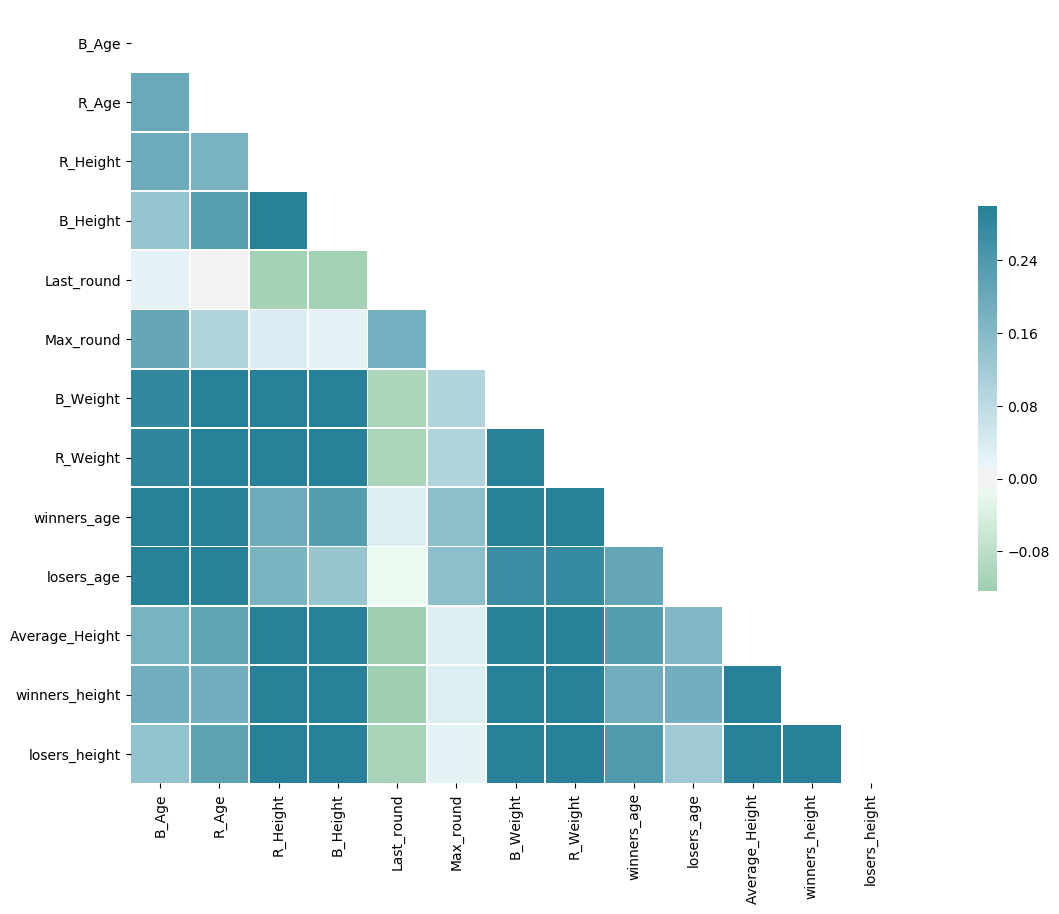

In [143]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(137, 220, s=90, l=50, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## 1. Does age have an impact on performance?

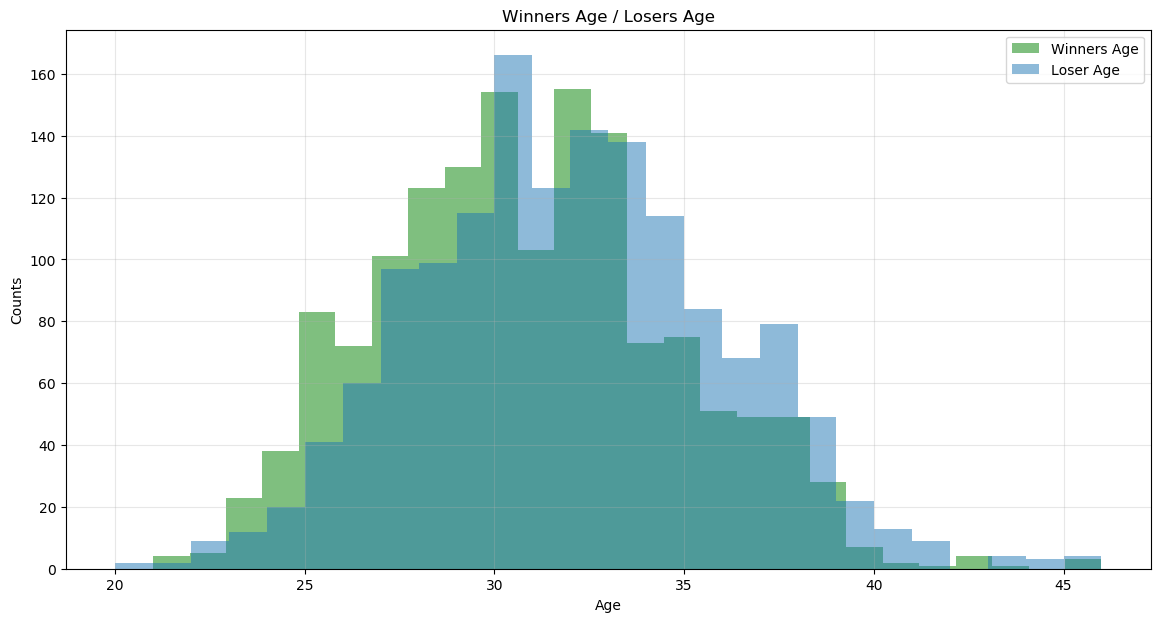

In [144]:
plt.figure(figsize=(14, 7))
plt.hist(df['winners_age'].dropna(), alpha=.5, bins=26, color='g', label='Winners Age') 
plt.hist(df['losers_age'].dropna(), alpha=.5, bins=26, label='Loser Age') 
plt.title('Winners Age / Losers Age')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.grid(alpha=.3)
plt.show()

Our data here for both data sets is normalized. However, both graphs are showing small amounts of skew. There's positive skew on our winners age data, and small amounts of negative skew on our losers age data. There's a spike in winners age around age twenty five on our histogram, and a small drop on our losers age around twenty five.

In [145]:
twentysix_w = df[df['winners_age'] == 25]
print(twentysix_w['winners_age'].groupby(twentysix_w['winners_age']).agg({'count'}))

twentysix_l = df[df['losers_age'] == 25]
print(twentysix_l['losers_age'].groupby(twentysix_l['losers_age']).agg({'count'})) 

             count
winners_age       
25.0            83
            count
losers_age       
25.0           41


 Taking a closer look at our observations on the histogram. The total observations of fights when one of the fighters is aged twenty five is 124. Age twenty five has eighty three recorded wins and fourty one recorded losses. Fighters aged twenty five are winning twice as much as they are losing. We can make the assumption that this is the prime age for a fighter. 

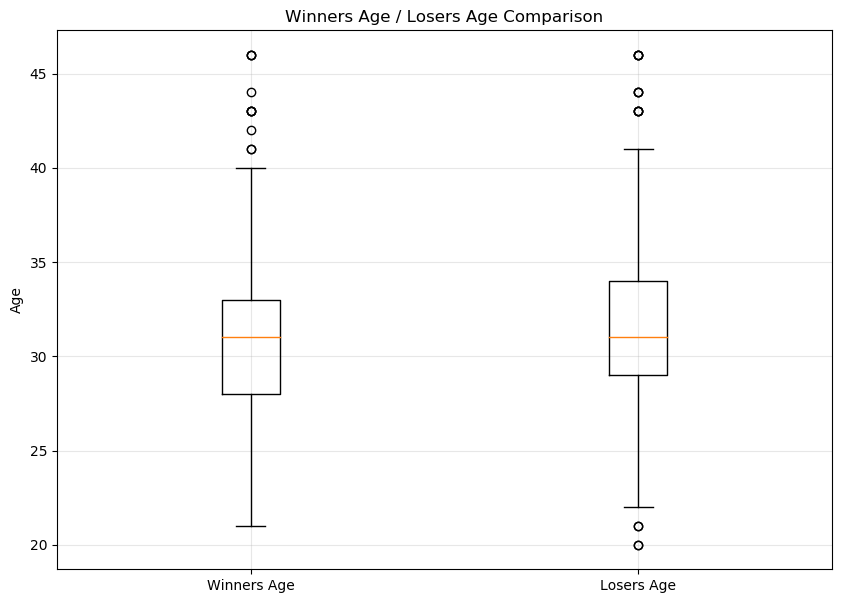

In [146]:
age_list = [df['winners_age'].dropna(), df['losers_age'].dropna()]
labels = ['Winners Age', 'Losers Age']

plt.figure(figsize=(10, 7))
plt.boxplot(age_list, labels=labels) 
plt.title('Winners Age / Losers Age Comparison')
plt.ylabel('Age')
plt.grid(alpha=.3)

plt.show()

Comparing our graphs here, the winners age graph sits lower on the age range. On the winners age box plot both whiskers, the top 25% and the bottom 25% of our data, sit lower on the age range when compared to our losers age boxplot. The interquartile of our winners age box plot hangs low below it's mean of 30.79, and the losers age interquartile sits high above it's mean of 31.54. The boxplot comparison here between losers age and winners age shows how young fighters win more often.

In [147]:
young_losers_df = df[df['losers_age'] <= 21]
young_losers_df[['winners_name','losers_name', 'winners_age', 'losers_age', 'winby', 'Date']]

,winners_name,losers_name,winners_age,losers_age,winby,Date
31,Bryan Barberena,Sage Northcutt,27.0,20.0,SUB,02/01/2016
677,Martin Bravo,Claudio Puelles,23.0,20.0,KO/TKO,11/07/2016
1150,Mickey Gall,Sage Northcutt,25.0,21.0,SUB,12/18/2016
1260,Ashlee Evans-Smith,Veronica Macedo,29.0,21.0,KO/TKO,09/05/2016


Here we are doing a case study on some of the boxplot outliers. This table shows fighters under twenty two years of age who lost. None of these fighters lost to anyone over the age of thirty. These young fighters on our boxplot are losing to fighters who are also young. I also noticed these young fighters who lost are very young. The experience of the slightly older fighters could play a role.

In [148]:
old_winners_df = df[df['winners_age'] > 40]
old_winners_df[['winners_name','losers_name', 'winners_age', 'losers_age', 'winby', 'Date']]

,winners_name,losers_name,winners_age,losers_age,winby,Date
61,Dan Henderson,Tim Boetsch,46.0,36.0,KO/TKO,06/08/2015
72,Anderson Silva,Derek Brunson,41.0,33.0,DEC,02/13/2017
255,Dan Henderson,Mauricio Rua,46.0,35.0,KO/TKO,03/24/2014
369,Mark Hunt,Antonio Silva,43.0,37.0,KO/TKO,11/18/2015
420,Chris Clements,Vik Grujic,41.0,40.0,KO/TKO,11/10/2014
725,Dan Henderson,Hector Lombard,46.0,39.0,KO/TKO,02/13/2017
833,Mark Hunt,Brock Lesnar,43.0,39.0,DEC,07/11/2016
1031,Anthony Perosh,Guto Inocente,44.0,30.0,SUB,11/10/2014
1224,Mark Hunt,Roy Nelson,43.0,40.0,KO/TKO,09/22/2014
1322,Mirko Cro Cop,Gabriel Gonzaga,42.0,37.0,KO/TKO,04/13/2015


These are the outliers on our winners age boxplot. This table shows fights where the winner was over fourty. These old fighters who win are only winning against fighters who are also older than the mean. No one on this table is under the age of thirty.

## 2. What is the average height of each weight division? Do taller fighters win more?


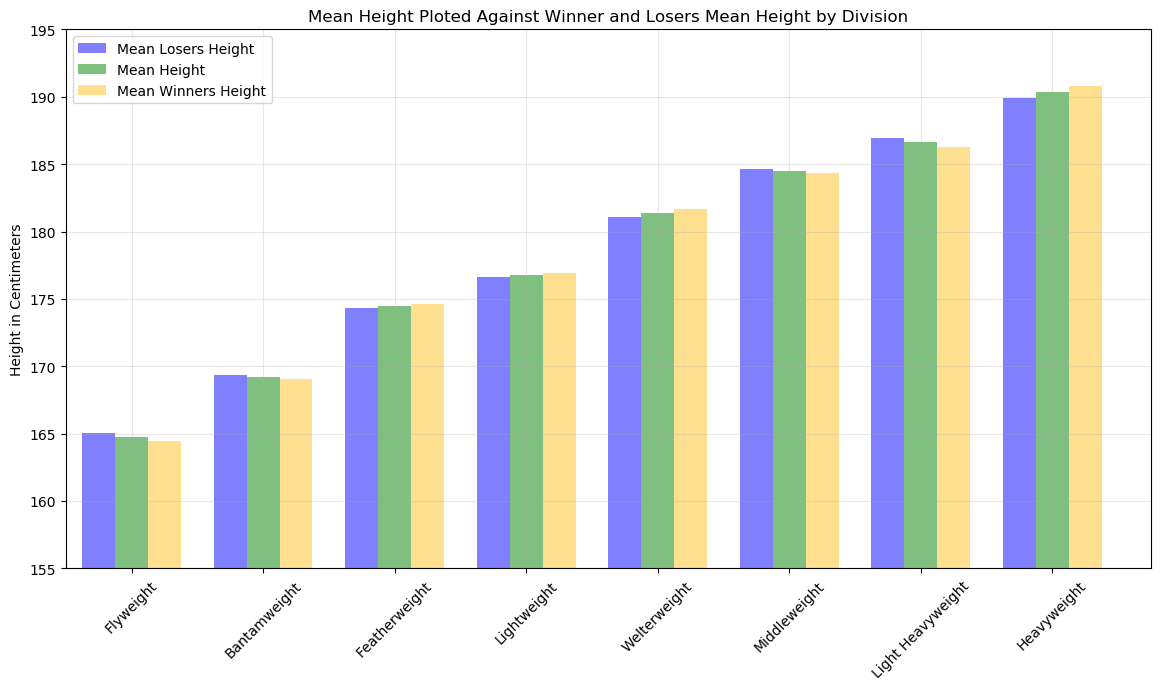

In [149]:
#Getting average height of each weight division, winners and losers, converting dataframe to list.
wddf = df.groupby(df['weight_division']).agg({np.mean})
avg_list = wddf['Average_Height']['mean'].tolist()
win_list = wddf['winners_height']['mean'].tolist()
lose_list = wddf['losers_height']['mean'].tolist()
lose_list.sort()
avg_list.sort()
win_list.sort()

#creating dataframe of values we found
raw_data = {'Division': weight_divisions,
        'losers_height': lose_list,
        'Average_Height': avg_list,
        'winners_height': win_list}

height_df = pd.DataFrame(raw_data, columns=('Division','losers_height','Average_Height','winners_height'))

# Setting the positions and width for the bars
pos = list(range(len(height_df['losers_height']))) 
width = 0.25 

fig, ax = plt.subplots(figsize=(14, 7))
plt.bar(pos, height_df['losers_height'], width, alpha=0.5, color='b') 
plt.bar([p + width for p in pos], height_df['Average_Height'], width, alpha=0.5, color='g') 
plt.bar([p + width*2 for p in pos], height_df['winners_height'], width, alpha=0.5, color='#FFC222') 

ax.set_title('Mean Height Ploted Against Winner and Losers Mean Height by Division')
ax.set_ylabel('Height in Centimeters')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(height_df['Division'])
plt.xlim(min(pos)-width, max(pos)+width*4)
ax.set_ylim([155,195])
plt.xticks(rotation=45)
plt.legend(['Mean Losers Height', 'Mean Height', 'Mean Winners Height'], loc='upper left')
plt.grid(alpha=.3)
plt.show()


Here we can see the mean height of each weight division, ploted against the losers and winners mean height in each division. The difference between our three means is less than a Centimeter in every division. So we can conclude that taller fighters don't win more. This is a case of the UFC being a premier league. Fighters are fighting in weight divisions they belong in.

In [150]:
HTML(height_df.to_html(index=False))

Division,losers_height,Average_Height,winners_height
Flyweight,165.072727,164.766667,164.460606
Bantamweight,169.376884,169.201005,169.025126
Featherweight,174.364130,174.494565,174.625000
Lightweight,176.628975,176.795053,176.961131
Welterweight,181.069343,181.368613,181.667883
Middleweight,184.638889,184.491667,184.344444
Light Heavyweight,186.968750,186.635417,186.302083
Heavyweight,189.915789,190.363158,190.770833


 ## 3. Which round do our fights end on? How do the fights end?

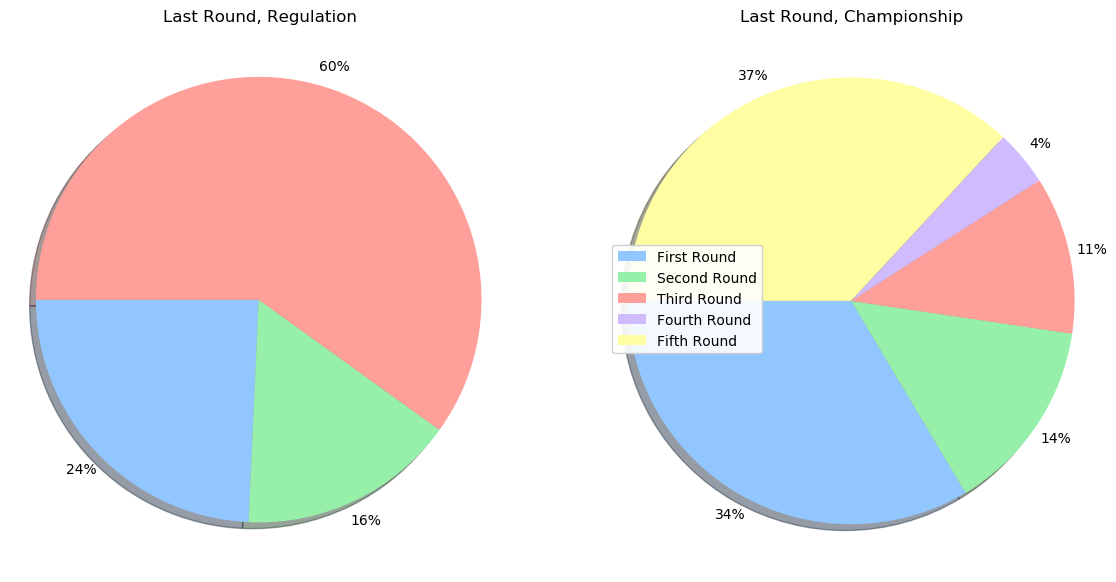

In [241]:
#Lastround Dataframe slices and aggregations
last_round_norm = df[(df['Max_round'] == 3) & (df['winby'] != None)]
last_round_champ = df[(df['Max_round'] == 5) & (df['winby'] != None)]

last_champ = last_round_champ.groupby(df['Last_round']).agg(['count'])
last_norm = last_round_norm.groupby(df['Last_round']).agg(['count'])

#Knockout dataframe slices and aggregations
ko_df_champ = df[(df['winby'] == 'KO/TKO') & (df['Max_round'] == 5)]
ko_df_norm = df[(df['winby'] == 'KO/TKO') & (df['Max_round'] == 3)]

ko_champ = ko_df_champ.groupby(df['Last_round']).agg(['count'])
ko_regulation = ko_df_norm.groupby(df['Last_round']).agg(['count'])

#Submission dataframe slices and aggregations
sub_df_champ = df[(df['winby'] == 'SUB') & (df['Max_round'] == 5)]
sub_df_norm = df[(df['winby'] == 'SUB') & (df['Max_round'] == 3)]

sub_champ = sub_df_champ.groupby(df['Last_round']).agg(['count'])
sub_regulation = sub_df_norm.groupby(df['Last_round']).agg(['count'])

#Decisions dataframe slices and aggregations
dec_df = df[(df['Max_round'] == 3) & (df['winby'] == 'DEC')]
dec_champ_df = df[(df['Max_round'] == 5) & (df['winby'] == 'DEC')]

other_df = df[(df['Max_round']  == 3)  & (df['winby'] != None)  & (df['winby'] != 'DEC')]
other_champ_df = df[(df['Max_round']  == 5)  & (df['winby'] != None)  & (df['winby'] != 'DEC')]

dec_list = [dec_df['Max_round'].count(), other_df['Max_round'].count()]
dec_champ_list = [dec_champ_df['Max_round'].count(), other_champ_df['Max_round'].count()]

#Legend labels and Piechart Colors
labels = ['First Round', 'Second Round', 'Third Round', 'Fourth Round', 'Fifth Round']
labels_decision = ['Decision', 'Other']
colors = sns.color_palette("pastel")
framealpha = .9
 
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
last_list = last_norm['Last_round', 'count'].tolist()
plt.pie(last_list, colors=colors, shadow=True, autopct='%1.0f%%', pctdistance=1.1, startangle=180)
plt.title('Last Round, Regulation')
plt.axis('equal')

plt.subplot(1, 2, 2)
last_champ_list = last_champ['Last_round', 'count'].tolist()
plt.pie(last_champ_list, colors=colors, shadow=True,autopct='%1.0f%%', pctdistance=1.1, startangle=180)
plt.title('Last Round, Championship')
plt.legend(labels, loc='center left', framealpha=framealpha)
plt.axis('equal')



plt.show()

The fights are classified by standard three round regulation fights and five round championship fights. 60% of our regulation fights go the distance of three rounds, and 37% of our championship fights go the distance of five rounds. First round has a strong showing for both charts. I assume this is because fighters are going for a knockout strategy, where they bulk up instead of build their physique for endurance. Only 4% of championship fights end on the fourth round, this is probably due to fighter fatigue. 

In [244]:
print("Last round counts ordered by round ascending.\n")
print('Regulation:'+ '    ' + str(last_list))
print('Championship:'+ '  ' + str(last_champ_list))

Last round counts ordered by round ascending.

Regulation:    [320, 208, 790]
Championship:  [50, 21, 17, 6, 55]


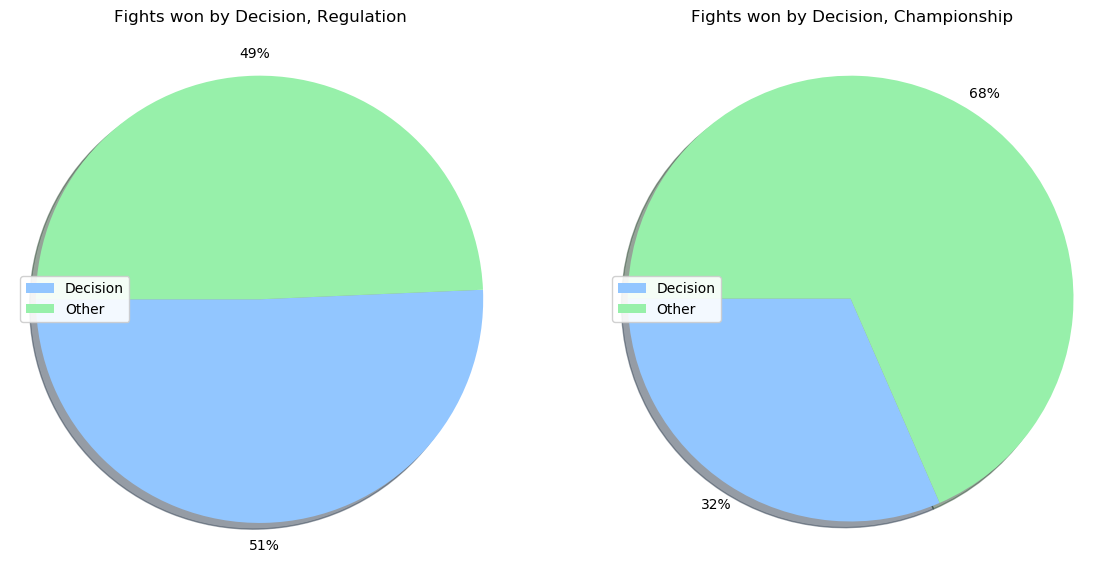

In [242]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie(dec_list, colors=colors, shadow=True, autopct='%1.0f%%', pctdistance=1.1, startangle=180)
plt.title('Fights won by Decision, Regulation')
plt.legend(labels_decision, loc='center left', framealpha=framealpha)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(dec_champ_list, colors=colors, shadow=True,autopct='%1.0f%%', pctdistance=1.1, startangle=180)
plt.title('Fights won by Decision, Championship')
plt.legend(labels_decision, loc='center left', framealpha=framealpha)
plt.axis('equal')

plt.show()

These charts are not broken down by round, because to win by decision you need to fight every round. 51% of all regulation fights are won by decision. This explains the large showing of last round finishes in our previous chart. Only 9% of regulation fights and 5% of championship fights are decided by knockout, TKO, or submission in the fifth round. This tells us that when the fight makes it to the last round, the fight is most likely going to be won or lost by decision. 

In [245]:
print('\nFormat: Decision, Other')
print('Regulation:'+ '    ' + str(dec_list))
print('Championship:'+ '  ' + str(dec_champ_list))


Format: Decision, Other
Regulation:    [668, 650]
Championship:  [47, 102]


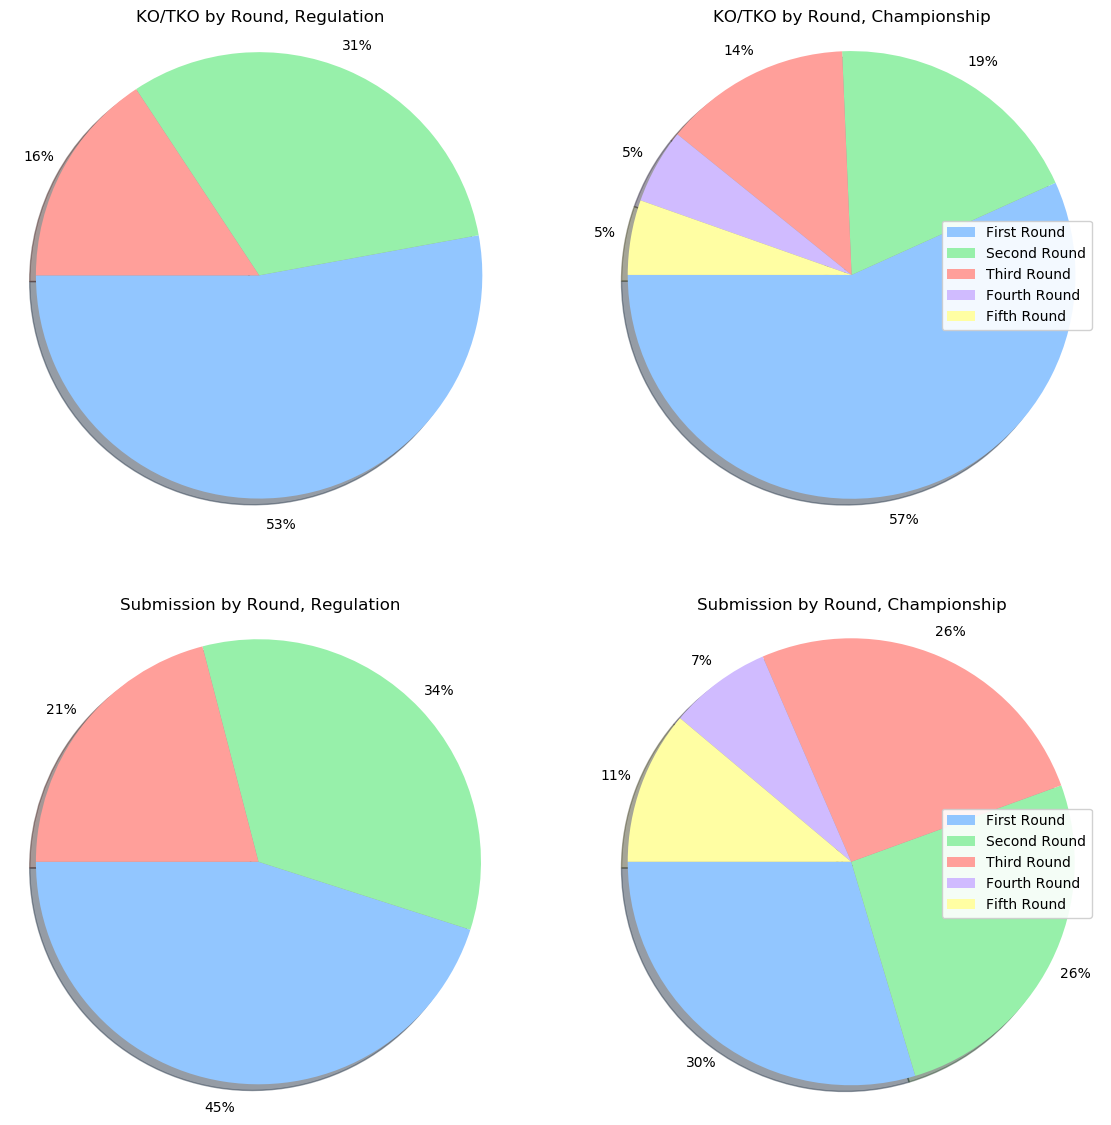

In [229]:
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
ko_regulation_list = ko_regulation['Last_round', 'count'].tolist()
plt.pie(ko_regulation_list, colors=colors, shadow=True,autopct='%1.0f%%', pctdistance=1.12, startangle=180)
plt.title('KO/TKO by Round, Regulation')
plt.axis('equal')

plt.subplot(2, 2, 2)
ko_champ_list = ko_champ['Last_round', 'count'].tolist()
plt.pie(ko_champ_list, colors=colors, shadow=True,autopct='%1.0f%%', pctdistance=1.12, startangle=180)
plt.title('KO/TKO by Round, Championship')
plt.legend(labels, loc='right', framealpha=framealpha)
plt.axis('equal')

plt.subplot(2, 2, 3)
sub_regulation_list = sub_regulation['Last_round', 'count'].tolist()
plt.pie(sub_regulation_list, colors=colors, shadow=True,autopct='%1.0f%%', pctdistance=1.12, startangle=180)
plt.title('Submission by Round, Regulation')
plt.axis('equal')

plt.subplot(2, 2, 4)
sub_champ_reg_list = sub_champ['Last_round', 'count'].tolist()
plt.pie(sub_champ_reg_list, colors=colors, shadow=True,autopct='%1.0f%%', pctdistance=1.12, startangle=180)
plt.title('Submission by Round, Championship')
plt.legend(labels, loc='right', framealpha=framealpha)
plt.axis('equal')

plt.show()

In our top row of pie charts we are looking at all fights that were won by knockout or technical knockout. 53% of knockouts happend in the first round of regulation fights, championship fights showed 57% for first round. In both classifications knockout counts drop significantly the longer the fights last. we can assume this is because of fighter fatigue, and likely fighter strategy. We mentioned earlier that fighters might build their physique for strength rather than endurance, enabling them to get these first round knockout wins.

The submissions charts are a good contrast to our knockouts, there's still a larger showing for first round wins by submission. We can assume this strong first round showing here is due to fatigue and possibly an opponent being outclassed. However, much like our knockout chart the fourth and fith rounds have a much smaller showing. This is likely due to fighter acclimatation to the championship fight. Fighters build their physique for three round fights and don't fully adjust for the championship rounds. 

In [247]:
print("Observations ordered by round ascending. \n")
print('Knockout / Technical Knockout counts:')
print('Regulation:'+ '    ' + str(ko_regulation_list))
print('Championship:'+ '  ' + str(ko_champ_list))
print('\nSubmission counts:')
print('Regulation:'+ '    ' + str(sub_regulation_list))
print('Championship:'+ '  ' + str(sub_champ_reg_list))

Observations ordered by round ascending. 

Knockout / Technical Knockout counts:
Regulation:    [202, 120, 60]
Championship:  [42, 14, 10, 4, 4]

Submission counts:
Regulation:    [114, 86, 53]
Championship:  [8, 7, 7, 2, 3]


##  4. Which fighter has won the most wins? How did he win?

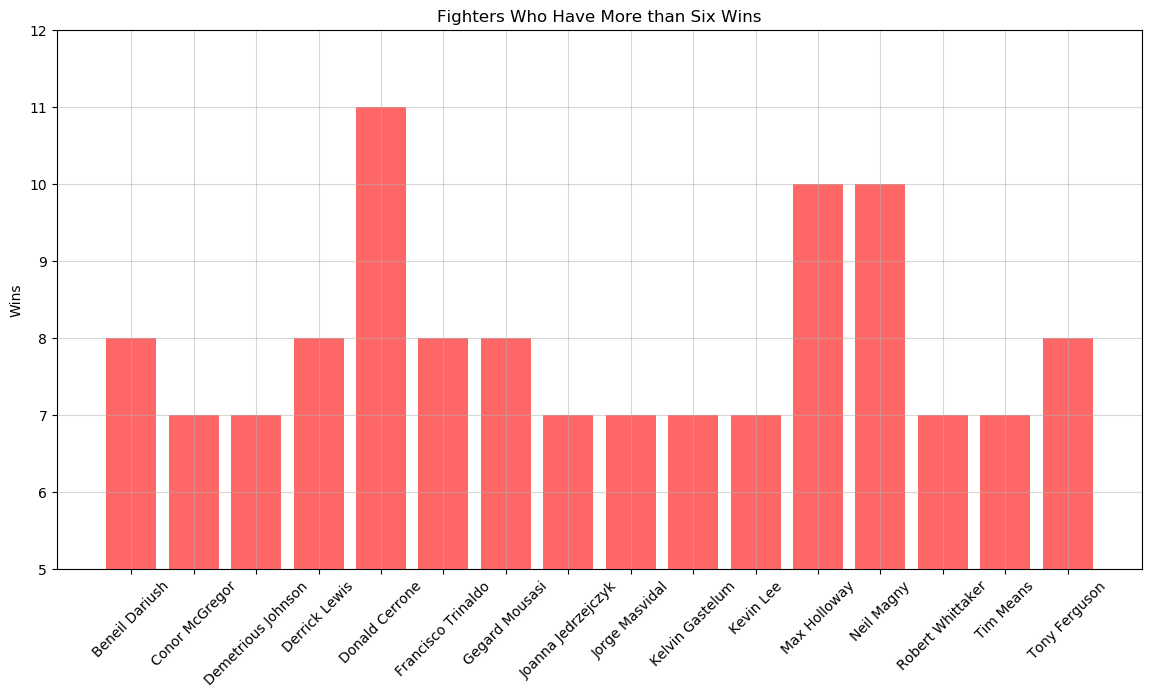

In [248]:
windf = df['winners_name'].groupby(df['winners_name']).agg(['count'])
windf = windf[windf['count'] > 6]

x_pos = np.arange(len(windf.index))
count = windf['count'].tolist()

plt.figure(figsize=(14, 7))
plt.bar(x_pos, count, align='center', alpha=0.6, color='r')
plt.xticks(x_pos, windf.index)
plt.xticks(rotation=45)
plt.title('Fighters Who Have More than Six Wins')
plt.ylabel('Wins')
plt.ylim(5, 12)
plt.grid(alpha=.5)

plt.show()

Donald Cerrone has the most wins recorded at eleven. Max Holloway and Neil Magny are close contenders with ten recorded wins.

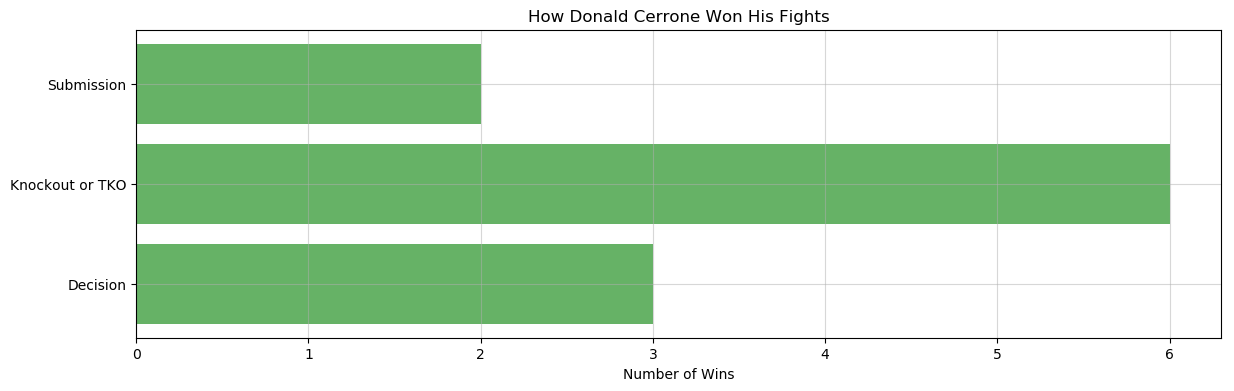

In [157]:
dcdf = df[df['winners_name']== 'Donald Cerrone']
dcdf = dcdf['winby'].groupby(dcdf['winby']).agg(['count'])

y_pos = np.arange(len(dcdf.index))
count = dcdf['count'].tolist()

plt.figure(figsize=(14, 4))
plt.barh(y_pos, count, align='center', alpha=0.6, color='g')
plt.yticks(y_pos, ('Decision', 'Knockout or TKO', 'Submission'))
plt.title('How Donald Cerrone Won His Fights')
plt.xlabel('Number of Wins')
plt.grid(alpha=.5)

plt.show()

I would describe donald cerrone as a high intensity fighter. The stats say the same as well. He wons six of his eleven fights by KO/TKO, with three decision wins and two submission wins. 

## Future Research and Analysis 

1. An API liscense would be really nice to get better and more up to date data set.
2. I would like to set up a predictive model and see how accurate it's fight outcomes would be.
3. Some of the current research could have more indepth context.